In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Nan, eliminar o no las filas si los ann son pequeño %
# ver la distribución de cada columna y graficos 
# estudiar paises origen / destino 
# buscar correlaciones entre aprobado/rechazado país origen/destino
# revisar notebook para ver más cosas que estudiar

##### UNHCR uses two rates to compute the proportion of refugee claims accepted. The Refugee Recognition Rate is the proportion of asylum-
##### seekers accorded refugee status out of the total number of substantive decisions (Convention status, complementary protection and rejected 
##### cases). The Total Protection Rate is the proportion of asylum-seekers accorded refugee status or a complementary form of protection relative 
##### to the total number of substantive decisions. Non-substantive decisions are, to the extent possible, excluded from both calculations. For the 
##### purposes of global comparability, UNHCR uses only these two rates and does not report rates calculated by national authorities

##### https://www.unhcr.org/global-trends-report-2022

In [ ]:
####

In [2]:
asylum = asylum = pd.read_csv('Data/asylum_decisions.csv')

In [3]:
asylum.head()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Authority,Stage of procedure,Cases / Persons,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
0,2014,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,248201,0,16687,264888
1,2015,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,148379,0,21,148400
2,2016,Syrian Arab Rep.,SYR,Germany,DEU,G,NaN,P,164926,121182,158,5398,291664
3,2017,Syrian Arab Rep.,SYR,Germany,DEU,G,NaN,P,34201,55274,107,7309,96891
4,2022,Syrian Arab Rep.,SYR,Germany,DEU,G,FI,P,15078,51754,34,6466,73332


In [4]:
print(asylum.shape)
print(asylum.info())

(101476, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101476 entries, 0 to 101475
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Year                      101476 non-null  int64 
 1   Country of origin         101476 non-null  object
 2   Country of origin (ISO)   101476 non-null  object
 3   Country of asylum         101476 non-null  object
 4   Country of asylum (ISO)   101476 non-null  object
 5   Authority                 101476 non-null  object
 6   Stage of procedure        99339 non-null   object
 7   Cases / Persons           101476 non-null  object
 8   Recognized decisions      101476 non-null  int64 
 9   Complementary protection  101476 non-null  int64 
 10  Rejected decisions        101476 non-null  int64 
 11  Otherwise closed          101476 non-null  int64 
 12  Total decisions           101476 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 10.1+ MB


In [5]:
# comprobamos distribución de valores por columna
print(asylum['Authority'].value_counts(dropna=False)/len(asylum)*100)
print(asylum['Stage of procedure'].value_counts(dropna=False)/len(asylum)*100)
print(asylum['Cases / Persons'].value_counts(dropna=False)/len(asylum)*100)

G    87.099413
U    12.263984
J     0.636604
Name: Authority, dtype: float64
FI     57.422445
AR     17.719461
FA      7.862943
RA      4.738066
IN      3.148528
EO      3.072648
JR      2.852891
NaN     2.105917
TA      0.427687
SP      0.298593
CA      0.174425
BL      0.093618
TP      0.081793
TR      0.000985
Name: Stage of procedure, dtype: float64
P    92.683984
C     7.316016
Name: Cases / Persons, dtype: float64


In [6]:
pd.DataFrame(asylum['Country of origin'].value_counts(dropna=False)/len(asylum)*100).head(10)


,Country of origin
Dem. Rep. of the Congo,2.142378
Iraq,2.131538
Afghanistan,2.081280
Somalia,2.068469
Iran (Islamic Rep. of),1.971895
Pakistan,1.917695
Syrian Arab Rep.,1.889117
Nigeria,1.879262
Sudan,1.838858
Ethiopia,1.673302


In [7]:
pd.DataFrame(asylum['Country of asylum'].value_counts(dropna=False)/len(asylum)*100).head(10)

,Country of asylum
United States of America,6.904096
Sweden,5.035673
Germany,5.021877
Canada,4.342899
United Kingdom of Great Britain and Northern Ireland,4.181284
France,4.079782
Netherlands (Kingdom of the),3.250030
Norway,3.184990
Belgium,3.149513
Australia,3.015491


<Axes: >

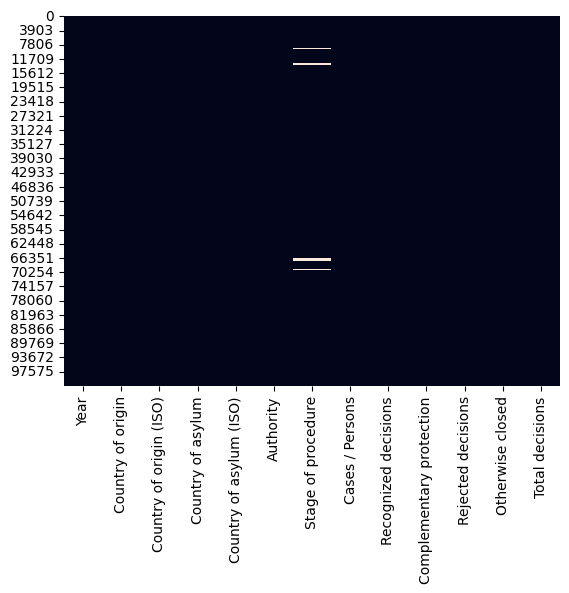

In [8]:
# heatmap para ver los Nan, como hemos visto antes solo hay una columna con nulos, que respresenan el 2,1% de los datos
sns.heatmap(asylum.isnull(), cbar=False)


In [9]:
# vamos a comparar la distribución de los datos en el DataFrame total con solo los datos donde hay Nan para ver si hay alguna diferencia 
asylum_nan = asylum[asylum['Stage of procedure'].isna()]

In [10]:
print(asylum_nan['Authority'].value_counts(dropna=False)/len(asylum_nan)*100)

print(asylum_nan['Cases / Persons'].value_counts(dropna=False)/len(asylum_nan)*100)

G    99.906411
U     0.093589
Name: Authority, dtype: float64
P    100.0
Name: Cases / Persons, dtype: float64


In [11]:
pd.DataFrame(asylum_nan['Country of origin'].value_counts(dropna=False)/len(asylum_nan)*100).head(10)

,Country of origin
Syrian Arab Rep.,1.029481
Iraq,1.029481
Guinea-Bissau,0.982686
Tunisia,0.982686
Benin,0.982686
Viet Nam,0.982686
Togo,0.982686
North Macedonia,0.982686
Myanmar,0.982686
Bosnia and Herzegovina,0.982686


In [12]:
pd.DataFrame(asylum_nan['Country of asylum'].value_counts(dropna=False)/len(asylum_nan)*100).head(10)

,Country of asylum
Germany,99.906411
United Arab Emirates,0.093589


In [13]:
# observamos que los nulos se concentran casi en un 100% en las solicitudes de asilo en Alemania, por lo que podemos eliminarlos sin miedo a perder información relevante o cambiar la distribución de los datos
asylum.dropna(inplace=True) 

### Exploratory Data Analysis

In [14]:
asylum.head()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Authority,Stage of procedure,Cases / Persons,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
0,2014,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,248201,0,16687,264888
1,2015,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,148379,0,21,148400
4,2022,Syrian Arab Rep.,SYR,Germany,DEU,G,FI,P,15078,51754,34,6466,73332
5,2016,Syrian Arab Rep.,SYR,Sweden,SWE,G,FI,P,2504,40971,136,4035,47646
6,2020,Venezuela (Bolivarian Republic of),VEN,Spain,ESP,G,FI,P,5,40396,882,0,41283


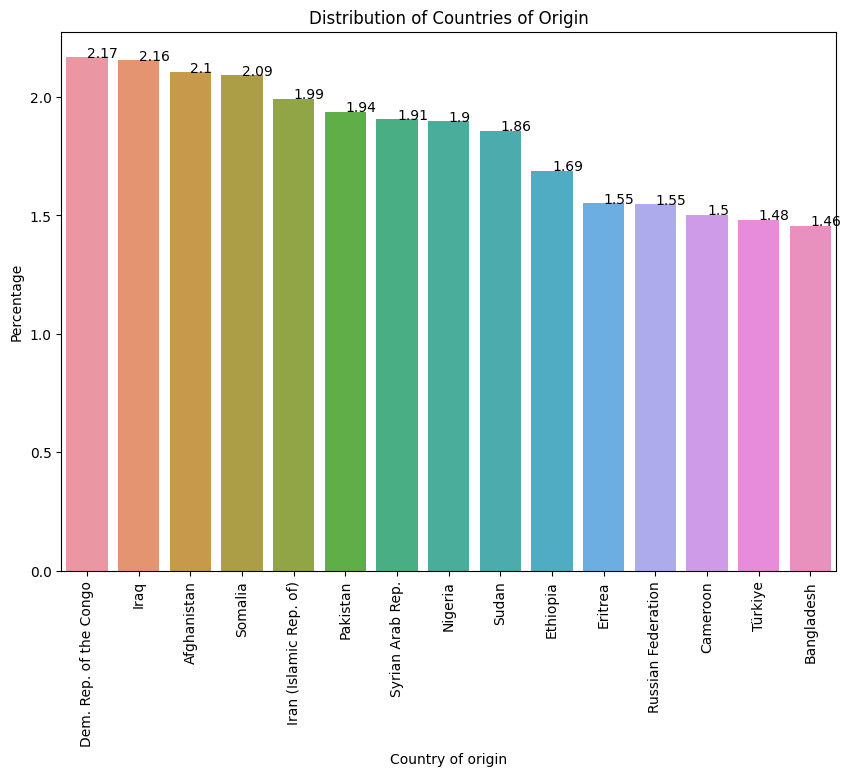

In [15]:
# vamos a empezar haciendo gráficos de barras para ver la distribución de los datos en las columnas que nos interesan
plt.figure(figsize=(10,7))
total_counts = len(asylum)
country_counts = asylum['Country of origin'].value_counts().head(15)
country_percentages = (country_counts / total_counts) * 100
sns.barplot(x=country_percentages.index, y=country_percentages.values)
for index, value in enumerate(country_percentages.values):
    plt.text(index, value, str(round(value,2)))
plt.xticks(rotation=90)
plt.xlabel('Country of origin')
plt.ylabel('Percentage')
plt.title('Distribution of Countries of Origin')
plt.show()





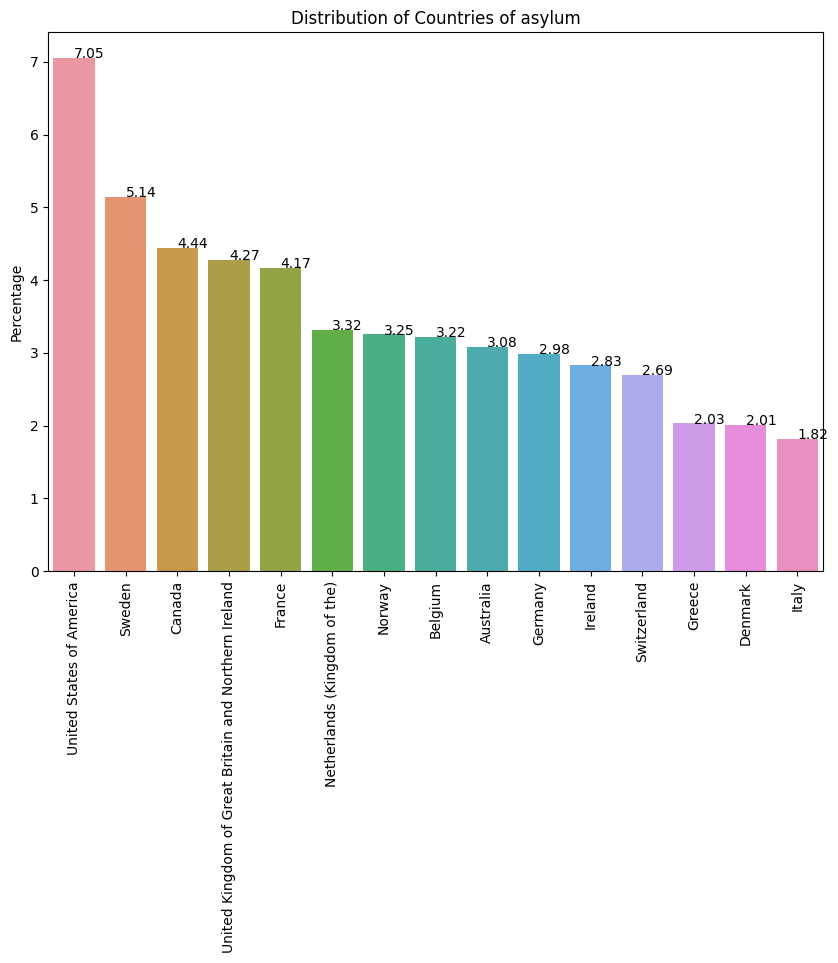

In [16]:
plt.figure(figsize=(10,7))
total_counts = len(asylum)
country_counts = asylum['Country of asylum'].value_counts().head(15)
country_percentages = (country_counts / total_counts) * 100
sns.barplot(x=country_percentages.index, y=country_percentages.values)
for index, value in enumerate(country_percentages.values):
    plt.text(index, value, str(round(value,2)))
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.title('Distribution of Countries of asylum')
plt.show()

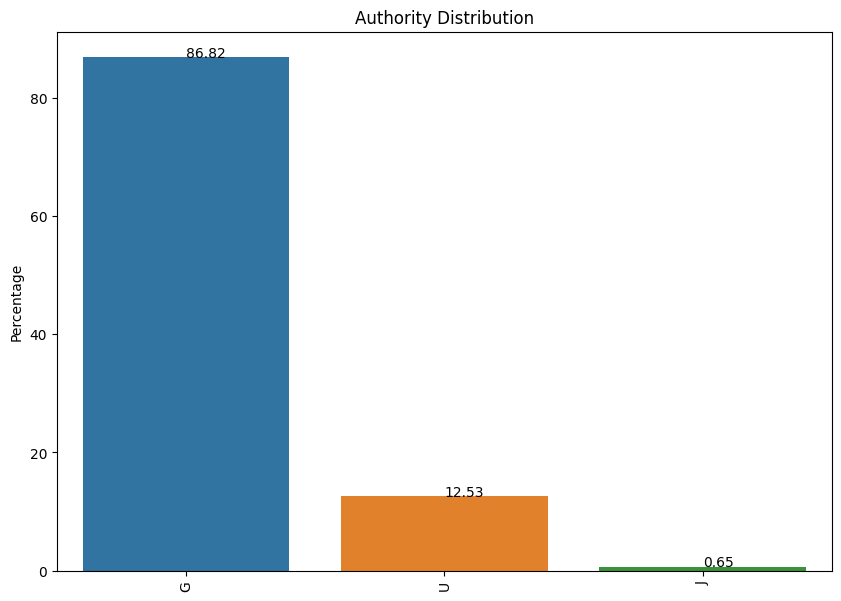

In [17]:
# veamos cómo se distribuyen las columnas Authority	
plt.figure(figsize=(10,7))
total_counts = len(asylum)
authority_counts = asylum['Authority'].value_counts().head(10)
authority_percentages = (authority_counts / total_counts) * 100
sns.barplot(x=authority_percentages.index, y=authority_percentages.values)
for index, value in enumerate(authority_percentages.values):
    plt.text(index, value, str(round(value,2)))
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.title('Authority Distribution')
plt.show()


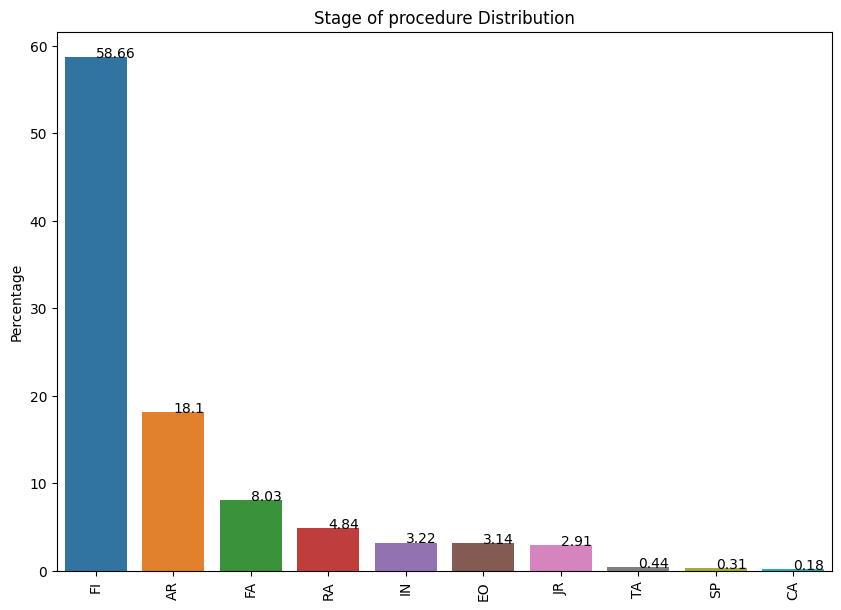

In [18]:
# lo mismo para Stage of procedure
plt.figure(figsize=(10,7))
total_counts = len(asylum)
authority_counts = asylum['Stage of procedure'].value_counts().head(10)
authority_percentages = (authority_counts / total_counts) * 100
sns.barplot(x=authority_percentages.index, y=authority_percentages.values)
for index, value in enumerate(authority_percentages.values):
    plt.text(index, value, str(round(value,2)))
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.title('Stage of procedure Distribution')
plt.show()

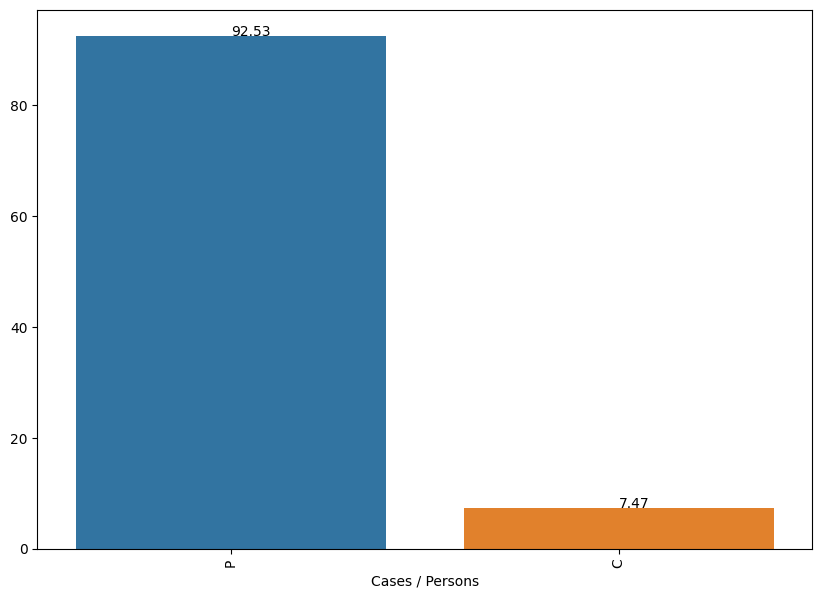

In [19]:
# Cases / Persons

plt.figure(figsize=(10,7))
total_counts = len(asylum)
authority_counts = asylum['Cases / Persons'].value_counts().head(10)
authority_percentages = (authority_counts / total_counts) * 100
sns.barplot(x=authority_percentages.index, y=authority_percentages.values)
plt.xlabel('Cases / Persons')
plt.xticks(rotation=90)
for index, value in enumerate(authority_percentages.values):
    plt.text(index, value, str(round(value,2)))
plt.show()

In [20]:
asylum.head()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Authority,Stage of procedure,Cases / Persons,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
0,2014,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,248201,0,16687,264888
1,2015,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,148379,0,21,148400
4,2022,Syrian Arab Rep.,SYR,Germany,DEU,G,FI,P,15078,51754,34,6466,73332
5,2016,Syrian Arab Rep.,SYR,Sweden,SWE,G,FI,P,2504,40971,136,4035,47646
6,2020,Venezuela (Bolivarian Republic of),VEN,Spain,ESP,G,FI,P,5,40396,882,0,41283


In [21]:
from_to_values = asylum.groupby(["Country of origin",'Country of asylum'])['Total decisions'].sum().reset_index().sort_values("Total decisions", ascending=False)
from_to_values

,Country of origin,Country of asylum,Total decisions
7368,Unknown,South Africa,970957
7163,Ukraine,Russian Federation,580275
2237,El Salvador,United States of America,420441
6559,Syrian Arab Rep.,Germany,360477
2859,Guatemala,United States of America,336693
...,...,...,...
1587,Congo,Rwanda,5
3043,Haiti,Trinidad and Tobago,5
6555,Syrian Arab Rep.,Fiji,5
4063,Libya,Russian Federation,5


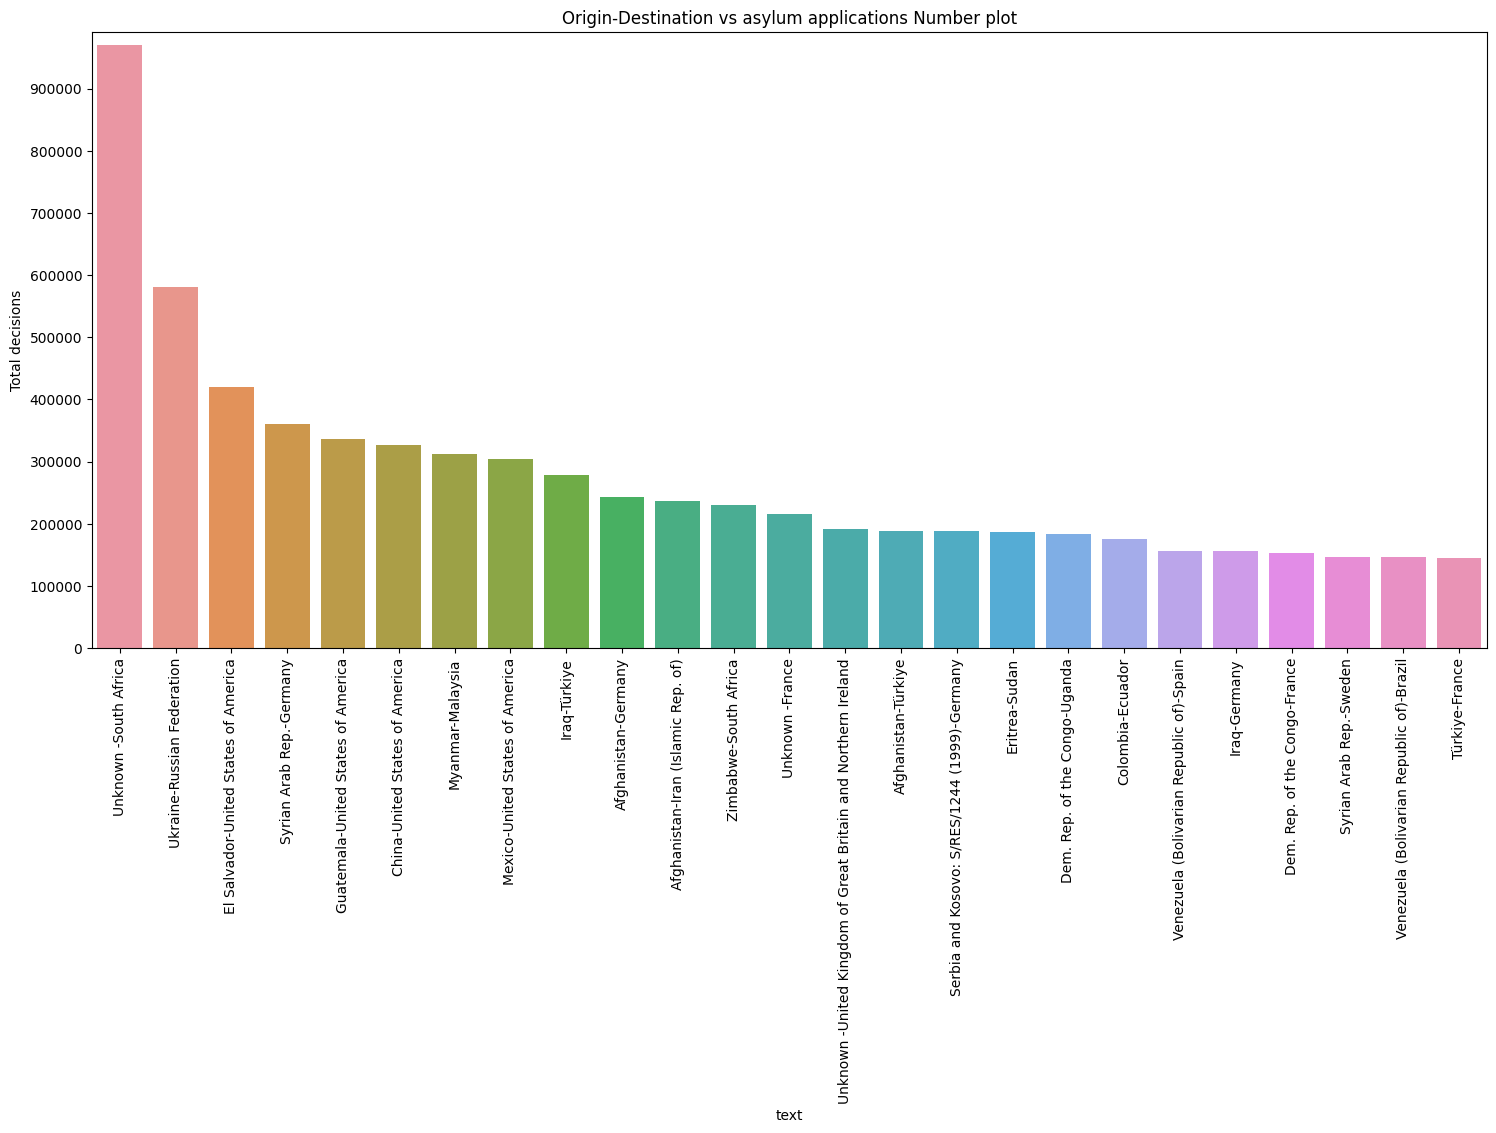

In [22]:
# este gráfico muestra el número de solicitudes de asilo por país de origen y destino totales 
from_to_values["text"] = from_to_values.apply(lambda row:row["Country of origin"]+"-"+row["Country of asylum"],axis=1)
from_to_values = from_to_values.sort_values(["Total decisions"],ascending=False).head(25)

plt.figure(figsize=(18,8));
ax = sns.barplot(x=from_to_values.text,y=from_to_values["Total decisions"]);
plt.title("Origin-Destination vs asylum applications Number plot");
plt.xticks(rotation='vertical');
plt.ylim(0, (from_to_values["Total decisions"]).max()+20000);
plt.yticks(np.arange(0, (from_to_values["Total decisions"]).max()+20000, 100000));
plt.show();

In [23]:
from_to_values

,Country of origin,Country of asylum,Total decisions,text
7368,Unknown,South Africa,970957,Unknown -South Africa
7163,Ukraine,Russian Federation,580275,Ukraine-Russian Federation
2237,El Salvador,United States of America,420441,El Salvador-United States of America
6559,Syrian Arab Rep.,Germany,360477,Syrian Arab Rep.-Germany
2859,Guatemala,United States of America,336693,Guatemala-United States of America
1410,China,United States of America,327123,China-United States of America
4547,Myanmar,Malaysia,312827,Myanmar-Malaysia
4357,Mexico,United States of America,303736,Mexico-United States of America
3437,Iraq,Türkiye,278682,Iraq-Türkiye
38,Afghanistan,Germany,243757,Afghanistan-Germany


In [24]:
from_to_values[from_to_values['Country of origin']=='Syrian Arab Rep.']

,Country of origin,Country of asylum,Total decisions,text
6559,Syrian Arab Rep.,Germany,360477,Syrian Arab Rep.-Germany
6628,Syrian Arab Rep.,Sweden,145926,Syrian Arab Rep.-Sweden


## preguntas:
### - De los 5 países con más solicitudes de asilo, hacia dónde han ido?
### - De los 5 países con más solicitudes recibidas, de donde vienen?
### - Cuáles han sido los mayores eventos de salida de un país? mirar por pais y año y ver qué pasó 
### - Mayor recibiemiento de personas en 1 año
### - Qué países aprueban/rechazan más solicitudes?
### Mirar España si ha soclicitado/recibido

## - De los 5 países con más solicitudes de asilo, hacia dónde han ido?

In [25]:
asylum.head()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Authority,Stage of procedure,Cases / Persons,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
0,2014,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,248201,0,16687,264888
1,2015,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,148379,0,21,148400
4,2022,Syrian Arab Rep.,SYR,Germany,DEU,G,FI,P,15078,51754,34,6466,73332
5,2016,Syrian Arab Rep.,SYR,Sweden,SWE,G,FI,P,2504,40971,136,4035,47646
6,2020,Venezuela (Bolivarian Republic of),VEN,Spain,ESP,G,FI,P,5,40396,882,0,41283


In [26]:
# Veamos cuáles son las nacionalidades que más solicitudes de asilo han realizado
origin = asylum.groupby('Country of origin')['Total decisions'].sum().reset_index().sort_values('Total decisions', ascending=False)
origin.head(10)

,Country of origin,Total decisions
197,Unknown,2018352
0,Afghanistan,1925760
87,Iraq,1321400
178,Syrian Arab Rep.,1273301
50,Dem. Rep. of the Congo,983247
192,Ukraine,816754
168,Somalia,802920
161,Serbia and Kosovo: S/RES/1244 (1999),763602
137,Pakistan,718683
36,China,686897


In [27]:
# Veamos de cada uno de los 7 países con más solicitudes de asilo, cuál es el país de destino más frecuente
# para ello agrupamos por país de origen y destino, seleccionamos las columnas de las decisiones de las solicitudes de asilo y totales y las sumamos
asylum['Country of origin'] = asylum['Country of origin'].str.strip()
asylum_Unknown = asylum[asylum['Country of origin']=='Unknown'].groupby(['Country of origin','Country of asylum'])[['Recognized decisions','Complementary protection','Rejected decisions','Otherwise closed','Total decisions']].sum().reset_index().sort_values('Total decisions', ascending=False)

asylum_Afghanistan = asylum[asylum['Country of origin']=='Afghanistan'].groupby(['Country of origin','Country of asylum'])[['Recognized decisions','Complementary protection','Rejected decisions','Otherwise closed','Total decisions']].sum().reset_index().sort_values('Total decisions', ascending=False)

asylum_Iraq = asylum[asylum['Country of origin']=='Iraq'].groupby(['Country of origin','Country of asylum'])[['Recognized decisions','Complementary protection','Rejected decisions','Otherwise closed','Total decisions']].sum().reset_index().sort_values('Total decisions', ascending=False)

asylum_Syria = asylum[asylum['Country of origin']=='Syrian Arab Rep.'].groupby(['Country of origin','Country of asylum'])[['Recognized decisions','Complementary protection','Rejected decisions','Otherwise closed','Total decisions']].sum().reset_index().sort_values('Total decisions', ascending=False)

asylum_Congo = asylum[asylum['Country of origin']=='Dem. Rep. of the Congo'].groupby(['Country of origin','Country of asylum'])[['Recognized decisions','Complementary protection','Rejected decisions','Otherwise closed','Total decisions']].sum().reset_index().sort_values('Total decisions', ascending=False)

asylum_Ukraine = asylum[asylum['Country of origin']=='Ukraine'].groupby(['Country of origin','Country of asylum'])[['Recognized decisions','Complementary protection','Rejected decisions','Otherwise closed','Total decisions']].sum().reset_index().sort_values('Total decisions', ascending=False)


In [28]:
asylum_Unknown.head(10)

,Country of origin,Country of asylum,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
61,Unknown,South Africa,13700,0,132407,824850,970957
21,Unknown,France,55125,20099,130752,9978,215954
72,Unknown,United Kingdom of Great Britain and Northern I...,34130,9321,118592,28998,191016
24,Unknown,Greece,4450,6695,28512,84296,123953
65,Unknown,Switzerland,9178,3375,40207,49992,102960
3,Unknown,Austria,5462,516,1149,52076,59203
32,Unknown,Japan,108,697,28147,14141,53786
4,Unknown,Belgium,4451,1389,31169,1518,45839
23,Unknown,Germany,8880,3660,7676,17086,37302
74,Unknown,United States of America,6956,359,8234,21223,36748


In [29]:
# Añadimos los porcentajes de cada tipo de decisión sobre el total de solicitudes de asilo
asylum_Unknown['Recognized decisions %'] = asylum_Unknown['Recognized decisions']/asylum_Unknown['Total decisions']*100
asylum_Unknown['Complementary protection %'] = asylum_Unknown['Complementary protection']/asylum_Unknown['Total decisions']*100
asylum_Unknown['Rejected decisions %'] = asylum_Unknown['Rejected decisions']/asylum_Unknown['Total decisions']*100
asylum_Unknown['Otherwise closed %'] = asylum_Unknown['Otherwise closed']/asylum_Unknown['Total decisions']*100

# Vamos a ordenar las columnas para que se vea mejor
asylum_Unknown = asylum_Unknown[['Country of origin','Country of asylum','Total decisions','Recognized decisions','Recognized decisions %','Complementary protection',
'Complementary protection %','Rejected decisions','Rejected decisions %','Otherwise closed','Otherwise closed %']]

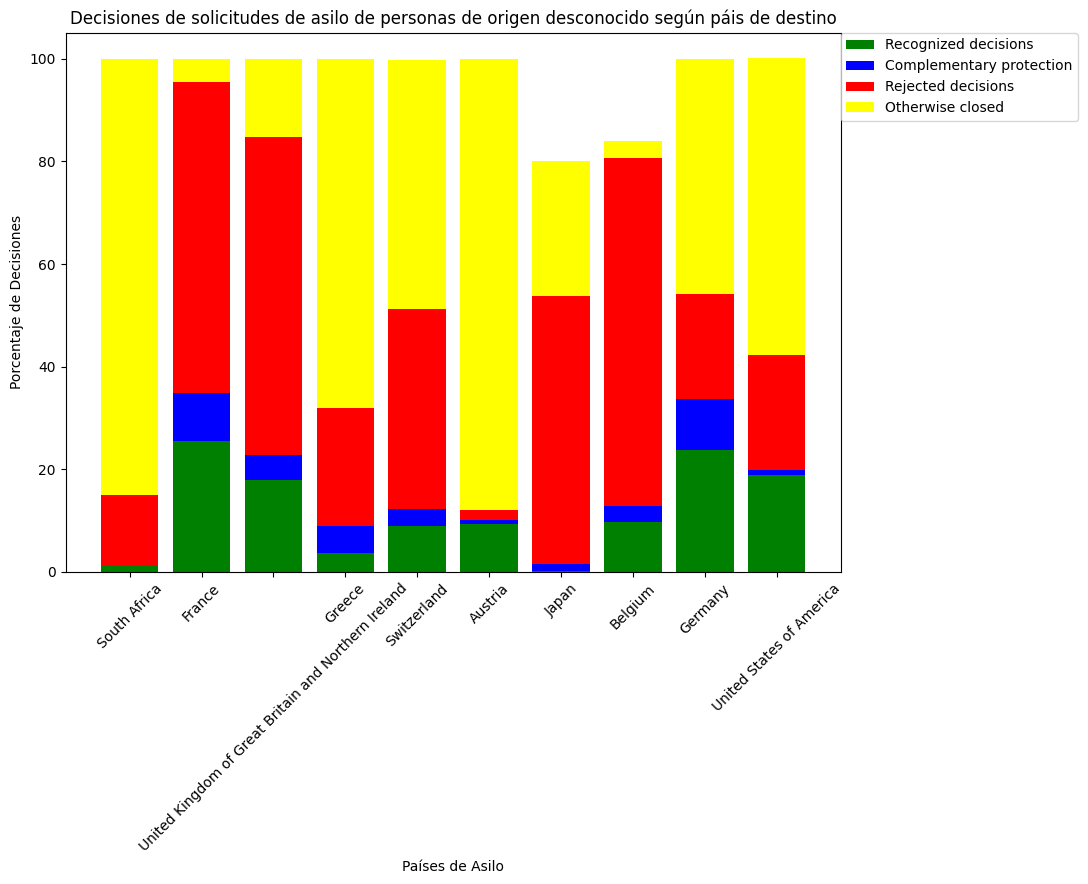

In [30]:
# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 7))

plt.bar(asylum_Unknown['Country of asylum'].head(10), asylum_Unknown['Recognized decisions %'].head(10), label='Recognized decisions', color='green')
plt.bar(asylum_Unknown['Country of asylum'].head(10), asylum_Unknown['Complementary protection %'].head(10), bottom=asylum_Unknown['Recognized decisions %'].head(10), label='Complementary protection', color='blue')
plt.bar(asylum_Unknown['Country of asylum'].head(10), asylum_Unknown['Rejected decisions %'].head(10), bottom=asylum_Unknown['Recognized decisions %'].head(10) + asylum_Unknown['Complementary protection %'].head(10), label='Rejected decisions',color='red')
plt.bar(asylum_Unknown['Country of asylum'].head(10), asylum_Unknown['Otherwise closed %'].head(10), bottom=asylum_Unknown['Recognized decisions %'].head(10) + asylum_Unknown['Complementary protection %'].head(10) + asylum_Unknown['Rejected decisions %'].head(10), label='Otherwise closed',color='yellow')

# movemos la leyenda fuera del gráfico
plt.legend(loc='center left', borderaxespad=0.)



plt.title('Decisiones de solicitudes de asilo de personas de origen desconocido según páis de destino')
plt.xlabel('Países de Asilo')
plt.xticks(rotation=45)
plt.ylabel('Porcentaje de Decisiones')
plt.legend(bbox_to_anchor=(1, 1),loc='best', borderaxespad=0.)

plt.show()

In [31]:
asylum_Afghanistan.head(10)

,Country of origin,Country of asylum,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
38,Afghanistan,Germany,31982,89560,34495,87720,243757
45,Afghanistan,Iran (Islamic Rep. of),83097,3940,147874,1691,236602
106,Afghanistan,Türkiye,29126,0,18261,141643,189030
5,Afghanistan,Austria,33579,19622,15582,51454,120237
100,Afghanistan,Sweden,14843,19136,65682,14519,114180
36,Afghanistan,France,32309,37042,31874,1094,102319
39,Afghanistan,Greece,22537,15420,26163,33160,97280
110,Afghanistan,United Kingdom of Great Britain and Northern I...,17968,20428,41574,14866,94836
41,Afghanistan,Hungary,408,2897,6624,72452,82381
77,Afghanistan,Pakistan,17928,0,25489,23984,67401


In [32]:
# Añadimos los porcentajes de cada tipo de decisión sobre el total de solicitudes de asilo
asylum_Afghanistan['Recognized decisions %'] = asylum_Afghanistan['Recognized decisions']/asylum_Afghanistan['Total decisions']*100
asylum_Afghanistan['Complementary protection %'] = asylum_Afghanistan['Complementary protection']/asylum_Afghanistan['Total decisions']*100
asylum_Afghanistan['Rejected decisions %'] = asylum_Afghanistan['Rejected decisions']/asylum_Afghanistan['Total decisions']*100
asylum_Afghanistan['Otherwise closed %'] = asylum_Afghanistan['Otherwise closed']/asylum_Afghanistan['Total decisions']*100

# Vamos a ordenar las columnas para que se vea mejor
asylum_Afghanistan = asylum_Afghanistan[['Country of origin','Country of asylum','Total decisions','Recognized decisions','Recognized decisions %','Complementary protection',
'Complementary protection %','Rejected decisions','Rejected decisions %','Otherwise closed','Otherwise closed %']]

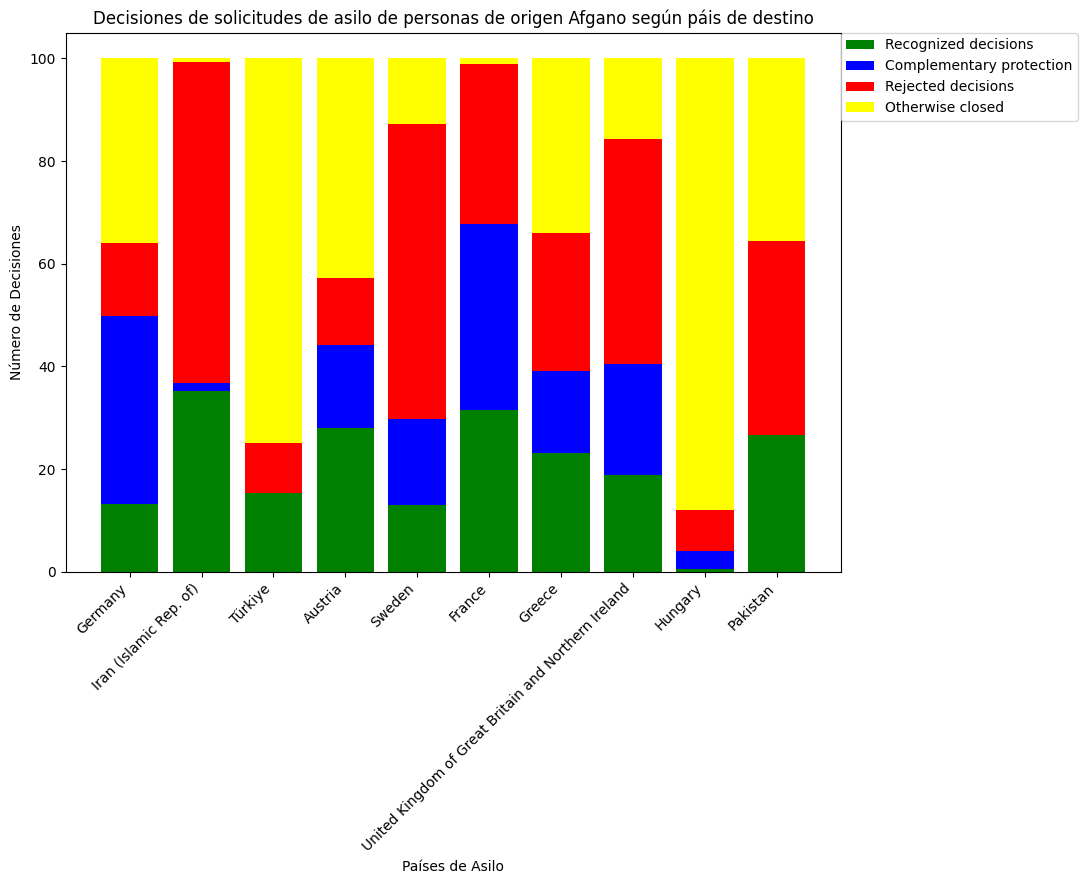

In [33]:
# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 7))

plt.bar(asylum_Afghanistan['Country of asylum'].head(10), asylum_Afghanistan['Recognized decisions %'].head(10), label='Recognized decisions', color='green')
plt.bar(asylum_Afghanistan['Country of asylum'].head(10), asylum_Afghanistan['Complementary protection %'].head(10), bottom=asylum_Afghanistan['Recognized decisions %'].head(10), label='Complementary protection', color='blue')
plt.bar(asylum_Afghanistan['Country of asylum'].head(10), asylum_Afghanistan['Rejected decisions %'].head(10), bottom=asylum_Afghanistan['Recognized decisions %'].head(10) + asylum_Afghanistan['Complementary protection %'].head(10), label='Rejected decisions',color='red')
plt.bar(asylum_Afghanistan['Country of asylum'].head(10), asylum_Afghanistan['Otherwise closed %'].head(10), bottom=asylum_Afghanistan['Recognized decisions %'].head(10) + asylum_Afghanistan['Complementary protection %'].head(10) + asylum_Afghanistan['Rejected decisions %'].head(10), label='Otherwise closed',color='yellow')

# movemos la leyenda fuera del gráfico
plt.legend(loc='center left', borderaxespad=0.)



plt.title('Decisiones de solicitudes de asilo de personas de origen Afgano según páis de destino')
plt.xlabel('Países de Asilo')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Número de Decisiones')
plt.legend(bbox_to_anchor=(1, 1),loc='best', borderaxespad=0.)
plt.show()

In [34]:
asylum_Iraq.head(10)

,Country of origin,Country of asylum,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
112,Iraq,Türkiye,101637,0,24872,152173,278682
43,Iraq,Germany,21222,13451,59470,61332,155475
104,Iraq,Sweden,8916,34783,74791,23800,142290
116,Iraq,United Kingdom of Great Britain and Northern I...,13249,17644,57880,13793,102566
76,Iraq,Netherlands (Kingdom of the),5051,20368,27291,19654,72364
45,Iraq,Greece,13144,4368,30584,12975,61071
56,Iraq,Jordan,24876,11,9097,13712,47696
39,Iraq,Finland,7198,5052,17010,12624,41884
106,Iraq,Syrian Arab Rep.,4403,239,5840,27835,38317
6,Iraq,Austria,6940,6148,6709,13853,33650


In [35]:
# Añadimos los porcentajes de cada tipo de decisión sobre el total de solicitudes de asilo
asylum_Iraq['Recognized decisions %'] = asylum_Iraq['Recognized decisions']/asylum_Iraq['Total decisions']*100
asylum_Iraq['Complementary protection %'] = asylum_Iraq['Complementary protection']/asylum_Iraq['Total decisions']*100
asylum_Iraq['Rejected decisions %'] = asylum_Iraq['Rejected decisions']/asylum_Iraq['Total decisions']*100
asylum_Iraq['Otherwise closed %'] = asylum_Iraq['Otherwise closed']/asylum_Iraq['Total decisions']*100

# Vamos a ordenar las columnas para que se vea mejor
asylum_Iraq = asylum_Iraq[['Country of origin','Country of asylum','Total decisions','Recognized decisions','Recognized decisions %','Complementary protection',
'Complementary protection %','Rejected decisions','Rejected decisions %','Otherwise closed','Otherwise closed %']]

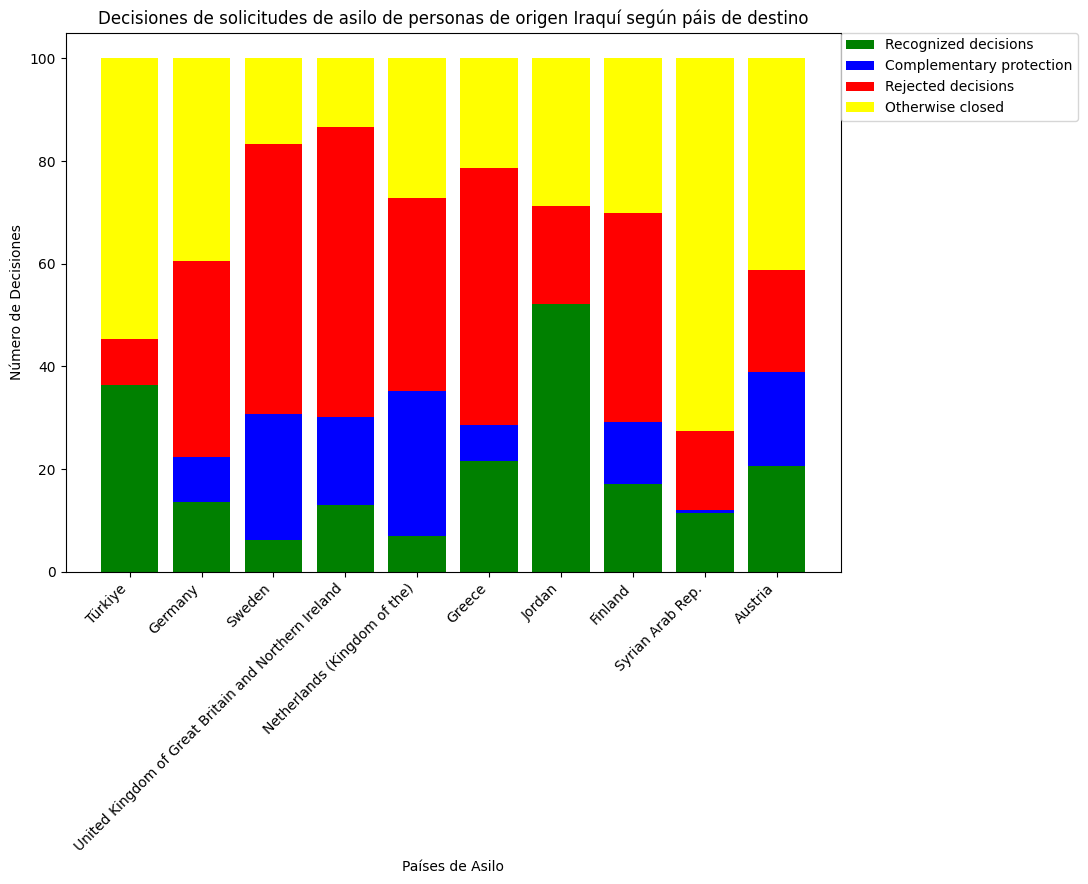

In [36]:
# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 7))

plt.bar(asylum_Iraq['Country of asylum'].head(10), asylum_Iraq['Recognized decisions %'].head(10), label='Recognized decisions', color='green')
plt.bar(asylum_Iraq['Country of asylum'].head(10), asylum_Iraq['Complementary protection %'].head(10), bottom=asylum_Iraq['Recognized decisions %'].head(10), label='Complementary protection', color='blue')
plt.bar(asylum_Iraq['Country of asylum'].head(10), asylum_Iraq['Rejected decisions %'].head(10), bottom=asylum_Iraq['Recognized decisions %'].head(10) + asylum_Iraq['Complementary protection %'].head(10), label='Rejected decisions',color='red')
plt.bar(asylum_Iraq['Country of asylum'].head(10), asylum_Iraq['Otherwise closed %'].head(10), bottom=asylum_Iraq['Recognized decisions %'].head(10) + asylum_Iraq['Complementary protection %'].head(10) + asylum_Iraq['Rejected decisions %'].head(10), label='Otherwise closed',color='yellow')

# movemos la leyenda fuera del gráfico
plt.legend(loc='center left', borderaxespad=0.)



plt.title('Decisiones de solicitudes de asilo de personas de origen Iraquí según páis de destino')
plt.xlabel('Países de Asilo')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Número de Decisiones')
plt.legend(bbox_to_anchor=(1, 1),loc='best', borderaxespad=0.)

plt.show()

In [37]:
asylum_Syria.head(10)

,Country of origin,Country of asylum,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
47,Syrian Arab Rep.,Germany,86087,115995,52413,105982,360477
116,Syrian Arab Rep.,Sweden,12928,100118,15480,17400,145926
6,Syrian Arab Rep.,Austria,69849,9856,1973,9611,91289
52,Syrian Arab Rep.,Hungary,227,841,1362,70628,73058
49,Syrian Arab Rep.,Greece,43411,482,5724,23254,72871
83,Syrian Arab Rep.,Netherlands (Kingdom of the),43260,9017,7498,5238,65013
45,Syrian Arab Rep.,France,16304,17031,6121,435,39891
16,Syrian Arab Rep.,Bulgaria,11839,15154,618,9184,36795
10,Syrian Arab Rep.,Belgium,20109,5600,4934,1409,32052
68,Syrian Arab Rep.,Libya,1439,0,10,28270,29719


In [38]:
# Añadimos los porcentajes de cada tipo de decisión sobre el total de solicitudes de asilo
asylum_Syria['Recognized decisions %'] = asylum_Syria['Recognized decisions']/asylum_Syria['Total decisions']*100
asylum_Syria['Complementary protection %'] = asylum_Syria['Complementary protection']/asylum_Syria['Total decisions']*100
asylum_Syria['Rejected decisions %'] = asylum_Syria['Rejected decisions']/asylum_Syria['Total decisions']*100
asylum_Syria['Otherwise closed %'] = asylum_Syria['Otherwise closed']/asylum_Syria['Total decisions']*100

# Vamos a ordenar las columnas para que se vea mejor
asylum_Syria = asylum_Syria[['Country of origin','Country of asylum','Total decisions','Recognized decisions','Recognized decisions %','Complementary protection',
'Complementary protection %','Rejected decisions','Rejected decisions %','Otherwise closed','Otherwise closed %']]

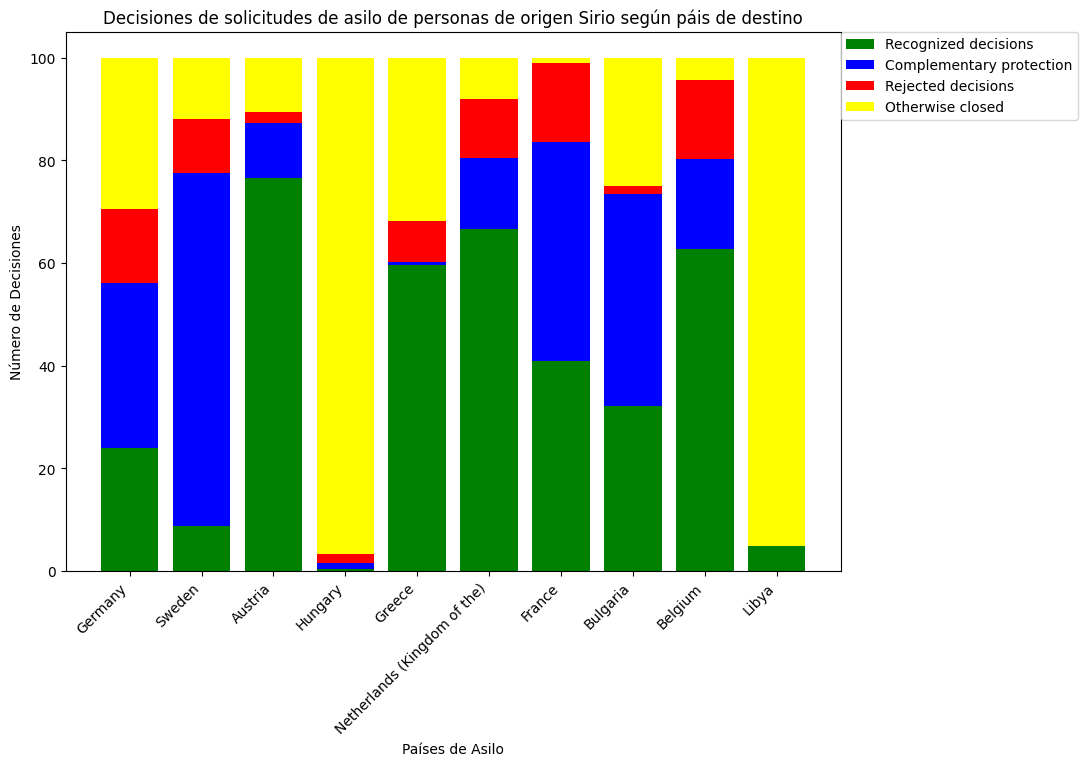

In [39]:
# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 7))

plt.bar(asylum_Syria['Country of asylum'].head(10), asylum_Syria['Recognized decisions %'].head(10), label='Recognized decisions', color='green')
plt.bar(asylum_Syria['Country of asylum'].head(10), asylum_Syria['Complementary protection %'].head(10), bottom=asylum_Syria['Recognized decisions %'].head(10), label='Complementary protection', color='blue')
plt.bar(asylum_Syria['Country of asylum'].head(10), asylum_Syria['Rejected decisions %'].head(10), bottom=asylum_Syria['Recognized decisions %'].head(10) + asylum_Syria['Complementary protection %'].head(10), label='Rejected decisions',color='red')
plt.bar(asylum_Syria['Country of asylum'].head(10), asylum_Syria['Otherwise closed %'].head(10), bottom=asylum_Syria['Recognized decisions %'].head(10) + asylum_Syria['Complementary protection %'].head(10) + asylum_Syria['Rejected decisions %'].head(10), label='Otherwise closed',color='yellow')

# movemos la leyenda fuera del gráfico
plt.legend(loc='center left', borderaxespad=0.)



plt.title('Decisiones de solicitudes de asilo de personas de origen Sirio según páis de destino')
plt.xlabel('Países de Asilo')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Número de Decisiones')
plt.legend(bbox_to_anchor=(1, 1),loc='best', borderaxespad=0.)

plt.show()

In [40]:
asylum_Congo.head(10)

,Country of origin,Country of asylum,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
114,Dem. Rep. of the Congo,Uganda,163816,0,11567,8913,184296
40,Dem. Rep. of the Congo,France,24376,2787,122263,3246,152672
14,Dem. Rep. of the Congo,Burundi,81155,417,6315,23529,111416
103,Dem. Rep. of the Congo,South Africa,18846,199,46901,25712,91658
120,Dem. Rep. of the Congo,Zambia,54351,54,2689,6411,63505
57,Dem. Rep. of the Congo,Kenya,26329,11012,2531,16575,56447
96,Dem. Rep. of the Congo,Rwanda,35922,2720,1103,1850,41595
68,Dem. Rep. of the Congo,Malawi,27418,25,224,13646,41580
116,Dem. Rep. of the Congo,United Kingdom of Great Britain and Northern I...,4509,2366,18743,2247,27865
8,Dem. Rep. of the Congo,Belgium,3694,123,18972,3141,25938


In [41]:
# Añadimos los porcentajes de cada tipo de decisión sobre el total de solicitudes de asilo
asylum_Congo['Recognized decisions %'] = asylum_Congo['Recognized decisions']/asylum_Congo['Total decisions']*100
asylum_Congo['Complementary protection %'] = asylum_Congo['Complementary protection']/asylum_Congo['Total decisions']*100
asylum_Congo['Rejected decisions %'] = asylum_Congo['Rejected decisions']/asylum_Congo['Total decisions']*100
asylum_Congo['Otherwise closed %'] = asylum_Congo['Otherwise closed']/asylum_Congo['Total decisions']*100

# Vamos a ordenar las columnas para que se vea mejor
asylum_Congo = asylum_Congo[['Country of origin','Country of asylum','Total decisions','Recognized decisions','Recognized decisions %','Complementary protection',
'Complementary protection %','Rejected decisions','Rejected decisions %','Otherwise closed','Otherwise closed %']]

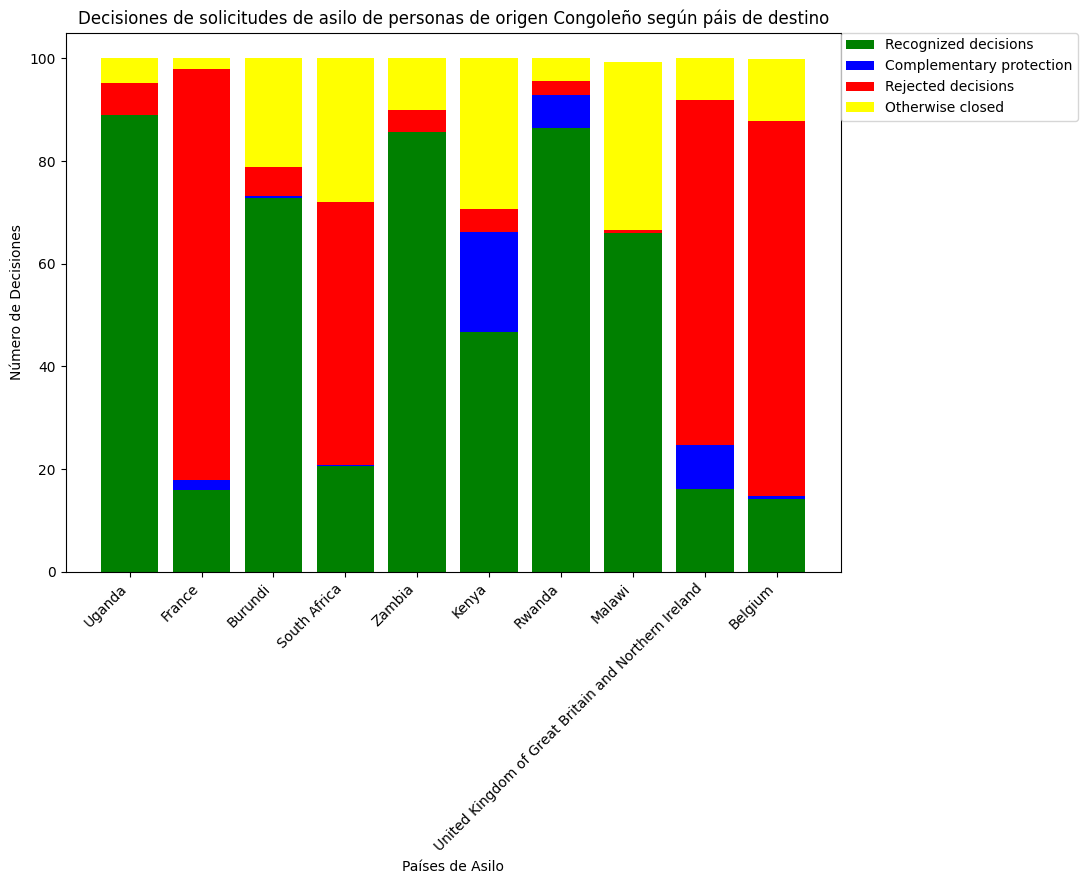

In [42]:
# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 7))

plt.bar(asylum_Congo['Country of asylum'].head(10), asylum_Congo['Recognized decisions %'].head(10), label='Recognized decisions', color='green')
plt.bar(asylum_Congo['Country of asylum'].head(10), asylum_Congo['Complementary protection %'].head(10), bottom=asylum_Congo['Recognized decisions %'].head(10), label='Complementary protection', color='blue')
plt.bar(asylum_Congo['Country of asylum'].head(10), asylum_Congo['Rejected decisions %'].head(10), bottom=asylum_Congo['Recognized decisions %'].head(10) + asylum_Congo['Complementary protection %'].head(10), label='Rejected decisions',color='red')
plt.bar(asylum_Congo['Country of asylum'].head(10), asylum_Congo['Otherwise closed %'].head(10), bottom=asylum_Congo['Recognized decisions %'].head(10) + asylum_Congo['Complementary protection %'].head(10) + asylum_Congo['Rejected decisions %'].head(10), label='Otherwise closed',color='yellow')

# movemos la leyenda fuera del gráfico
plt.legend(loc='center left', borderaxespad=0.)



plt.title('Decisiones de solicitudes de asilo de personas de origen Congoleño según páis de destino')
plt.xlabel('Países de Asilo')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Número de Decisiones')
plt.legend(bbox_to_anchor=(1, 1),loc='best', borderaxespad=0.)

plt.show()

In [43]:
asylum_Ukraine.head(10)

,Country of origin,Country of asylum,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
60,Ukraine,Russian Federation,115253,432746,5787,26489,580275
24,Ukraine,France,1905,2369,17029,1216,22519
16,Ukraine,Czechia,272,733,15826,5225,22056
33,Ukraine,Italy,585,8989,8960,252,18786
32,Ukraine,Israel,0,33,7245,9578,16856
67,Ukraine,Sweden,85,436,11641,4286,16448
65,Ukraine,Spain,550,2370,12248,639,15807
74,Ukraine,United States of America,4424,11,4926,6266,15627
26,Ukraine,Germany,86,569,5624,7184,13463
55,Ukraine,Poland,123,2047,8063,3235,13445


In [44]:
# Añadimos los porcentajes de cada tipo de decisión sobre el total de solicitudes de asilo
asylum_Ukraine['Recognized decisions %'] = asylum_Ukraine['Recognized decisions']/asylum_Ukraine['Total decisions']*100
asylum_Ukraine['Complementary protection %'] = asylum_Ukraine['Complementary protection']/asylum_Ukraine['Total decisions']*100
asylum_Ukraine['Rejected decisions %'] = asylum_Ukraine['Rejected decisions']/asylum_Ukraine['Total decisions']*100
asylum_Ukraine['Otherwise closed %'] = asylum_Ukraine['Otherwise closed']/asylum_Ukraine['Total decisions']*100

# Vamos a ordenar las columnas para que se vea mejor
asylum_Ukraine = asylum_Ukraine[['Country of origin','Country of asylum','Total decisions','Recognized decisions','Recognized decisions %','Complementary protection',
'Complementary protection %','Rejected decisions','Rejected decisions %','Otherwise closed','Otherwise closed %']]

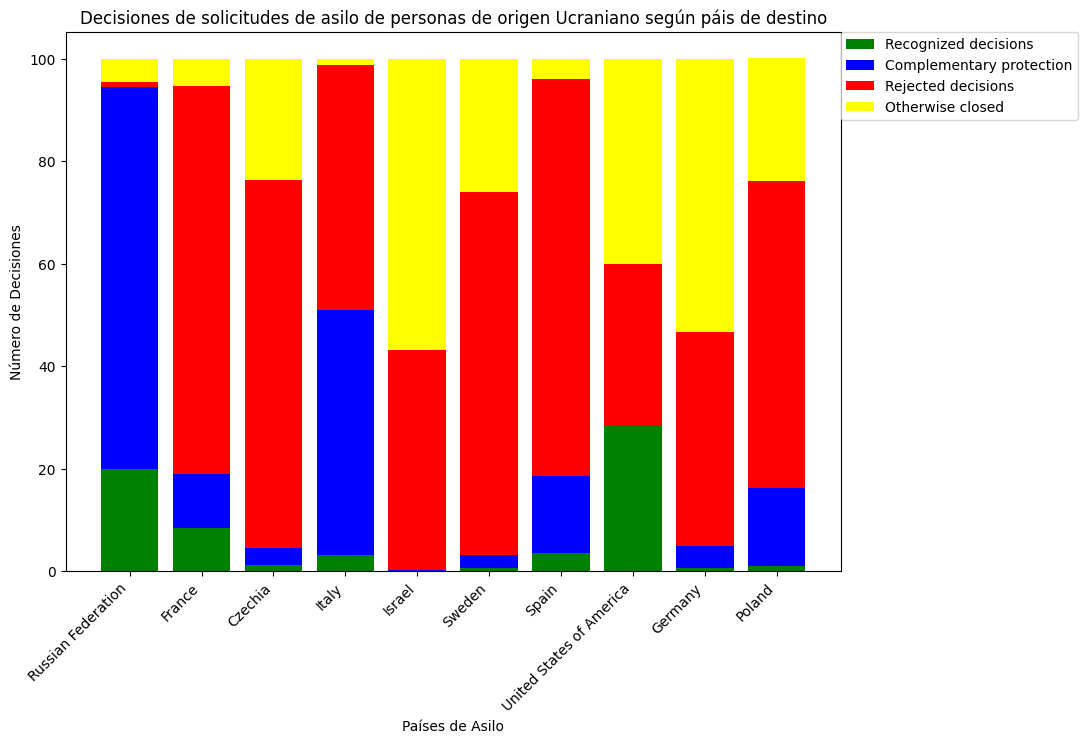

In [45]:
# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 7))

plt.bar(asylum_Ukraine['Country of asylum'].head(10), asylum_Ukraine['Recognized decisions %'].head(10), label='Recognized decisions', color='green')
plt.bar(asylum_Ukraine['Country of asylum'].head(10), asylum_Ukraine['Complementary protection %'].head(10), bottom=asylum_Ukraine['Recognized decisions %'].head(10), label='Complementary protection', color='blue')
plt.bar(asylum_Ukraine['Country of asylum'].head(10), asylum_Ukraine['Rejected decisions %'].head(10), bottom=asylum_Ukraine['Recognized decisions %'].head(10) + asylum_Ukraine['Complementary protection %'].head(10), label='Rejected decisions',color='red')
plt.bar(asylum_Ukraine['Country of asylum'].head(10), asylum_Ukraine['Otherwise closed %'].head(10), bottom=asylum_Ukraine['Recognized decisions %'].head(10) + asylum_Ukraine['Complementary protection %'].head(10) + asylum_Ukraine['Rejected decisions %'].head(10), label='Otherwise closed',color='yellow')

# movemos la leyenda fuera del gráfico
plt.legend(loc='center left', borderaxespad=0.)



plt.title('Decisiones de solicitudes de asilo de personas de origen Ucraniano según páis de destino')
plt.xlabel('Países de Asilo')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Número de Decisiones')
plt.legend(bbox_to_anchor=(1, 1),loc='best', borderaxespad=0.)

plt.show()

## - De los 5 países con más solicitudes recibidas, de donde vienen?

In [46]:
asylum.head()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Authority,Stage of procedure,Cases / Persons,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
0,2014,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,248201,0,16687,264888
1,2015,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,148379,0,21,148400
4,2022,Syrian Arab Rep.,SYR,Germany,DEU,G,FI,P,15078,51754,34,6466,73332
5,2016,Syrian Arab Rep.,SYR,Sweden,SWE,G,FI,P,2504,40971,136,4035,47646
6,2020,Venezuela (Bolivarian Republic of),VEN,Spain,ESP,G,FI,P,5,40396,882,0,41283


In [47]:
# Veamos cuáles son las nacionalidades que más solicitudes de asilo han realizado
destiny = asylum.groupby('Country of asylum')['Total decisions'].sum().reset_index().sort_values('Total decisions', ascending=False)
destiny.head(10)

,Country of asylum,Total decisions
174,United States of America,2828917
59,France,2577299
63,Germany,1914182
151,South Africa,1869582
172,United Kingdom of Great Britain and Northern I...,1535461
157,Sweden,1134817
81,Italy,897077
28,Canada,753258
65,Greece,748663
158,Switzerland,703738


In [49]:
# Veamos de cada uno de los 7 países con más solicitudes de asilo, cuál es el país de destino más frecuente
# para ello agrupamos por país de origen y destino, seleccionamos las columnas de las decisiones de las solicitudes de asilo y totales y las sumamos

asylum_USA = asylum[asylum['Country of asylum']=='United States of America'].groupby(['Country of origin','Country of asylum'])[['Recognized decisions','Complementary protection','Rejected decisions','Otherwise closed','Total decisions']].sum().reset_index().sort_values('Total decisions', ascending=False)

asylum_France = asylum[asylum['Country of asylum']=='France'].groupby(['Country of origin','Country of asylum'])[['Recognized decisions','Complementary protection','Rejected decisions','Otherwise closed','Total decisions']].sum().reset_index().sort_values('Total decisions', ascending=False)

asylum_Germany = asylum[asylum['Country of asylum']=='Germany'].groupby(['Country of origin','Country of asylum'])[['Recognized decisions','Complementary protection','Rejected decisions','Otherwise closed','Total decisions']].sum().reset_index().sort_values('Total decisions', ascending=False)

asylum_SA = asylum[asylum['Country of asylum']=='South Africa'].groupby(['Country of origin','Country of asylum'])[['Recognized decisions','Complementary protection','Rejected decisions','Otherwise closed','Total decisions']].sum().reset_index().sort_values('Total decisions', ascending=False)

asylum_UK = asylum[asylum['Country of asylum']=='United Kingdom of Great Britain and Northern Ireland'].groupby(['Country of origin','Country of asylum'])[['Recognized decisions','Complementary protection','Rejected decisions','Otherwise closed','Total decisions']].sum().reset_index().sort_values('Total decisions', ascending=False)

asylum_Sweden = asylum[asylum['Country of asylum']=='Sweden'].groupby(['Country of origin','Country of asylum'])[['Recognized decisions','Complementary protection','Rejected decisions','Otherwise closed','Total decisions']].sum().reset_index().sort_values('Total decisions', ascending=False)

In [75]:
# Vamos a crear una función para dado un país de asylum crea el dataframe filtrado y crea las columnas con los porcentajes de cada tipo de decisión sobre el total de solicitudes de asilo
def asylum_country(country):
    asylum_country = asylum[asylum['Country of asylum']==country].groupby(['Country of origin','Country of asylum'])[['Recognized decisions','Complementary protection','Rejected decisions','Otherwise closed','Total decisions']].sum().reset_index().sort_values('Total decisions', ascending=False)
    asylum_country['Recognized decisions %'] = asylum_country['Recognized decisions']/asylum_country['Total decisions']*100
    asylum_country['Complementary protection %'] = asylum_country['Complementary protection']/asylum_country['Total decisions']*100
    asylum_country['Rejected decisions %'] = asylum_country['Rejected decisions']/asylum_country['Total decisions']*100
    asylum_country['Otherwise closed %'] = asylum_country['Otherwise closed']/asylum_country['Total decisions']*100
    asylum_country = asylum_country[['Country of origin','Country of asylum','Total decisions','Recognized decisions','Recognized decisions %','Complementary protection',
    'Complementary protection %','Rejected decisions','Rejected decisions %','Otherwise closed','Otherwise closed %']]
    return asylum_country
    
# con al funcion asylum_country creada crearemos otra para hacer el gráfico de barras apiladas de las decisiones tomadas con las solicitudes de asilo segñun el país de origen, 
# tomaremos solo los 7 paises de origen que más solicitudes de asilo han realizado 
def asylum_country_graph(country):
    asylum_country_graph = asylum_country(country)
    plt.figure(figsize=(10, 7))
    plt.bar(asylum_country_graph['Country of origin'].head(10), asylum_country_graph['Recognized decisions %'].head(10), label='Recognized decisions', color='green')
    plt.bar(asylum_country_graph['Country of origin'].head(10), asylum_country_graph['Complementary protection %'].head(10), bottom=asylum_country_graph['Recognized decisions %'].head(10), label='Complementary protection', color='blue')
    plt.bar(asylum_country_graph['Country of origin'].head(10), asylum_country_graph['Rejected decisions %'].head(10), bottom=asylum_country_graph['Recognized decisions %'].head(10) + asylum_country_graph['Complementary protection %'].head(10), label='Rejected decisions',color='red')
    plt.bar(asylum_country_graph['Country of origin'].head(10), asylum_country_graph['Otherwise closed %'].head(10), bottom=asylum_country_graph['Recognized decisions %'].head(10) + asylum_country_graph['Complementary protection %'].head(10) + asylum_country_graph['Rejected decisions %'].head(10), label='Otherwise closed',color='yellow')
    plt.legend(loc='center left', borderaxespad=0.)
    plt.title('Decisiones de solicitudes de asilo en '+country+' por país de origen')
    plt.xlabel('Países de Asilo')
    plt.xticks(rotation=45,ha='right')
    plt.ylabel('Número de Decisiones')
    plt.legend(bbox_to_anchor=(1, 1),loc='best', borderaxespad=0.)
    plt.show()


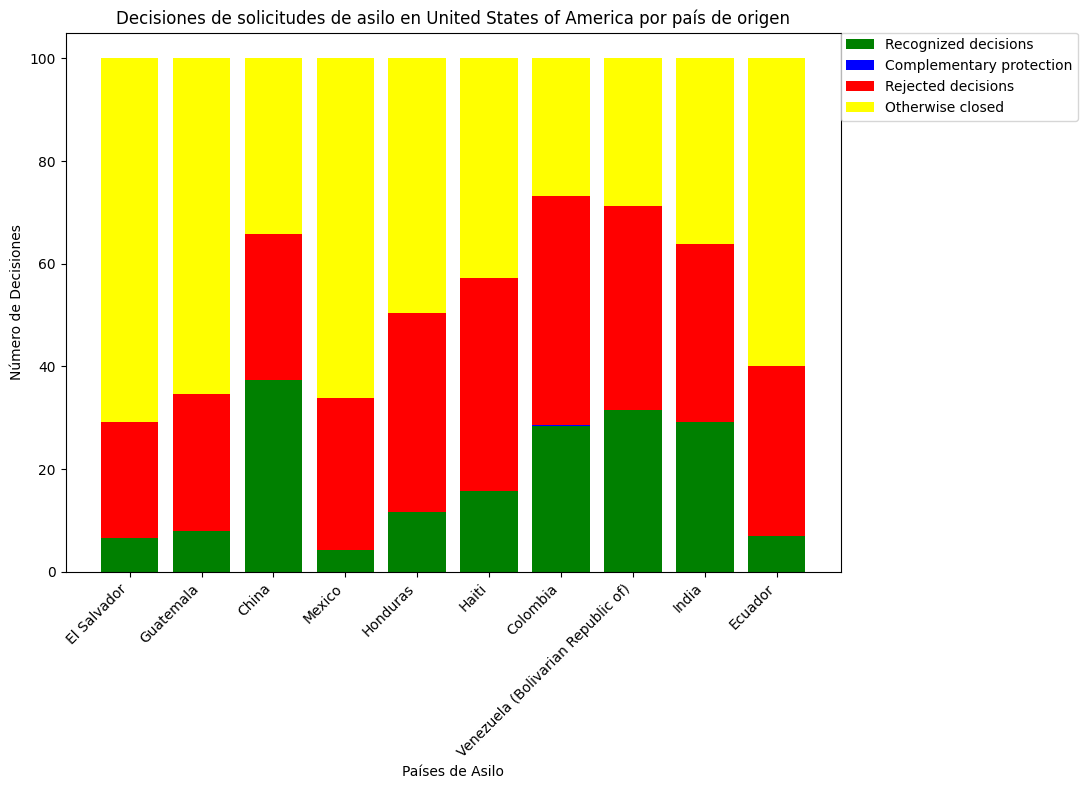

In [76]:
asylum_country_graph('United States of America')

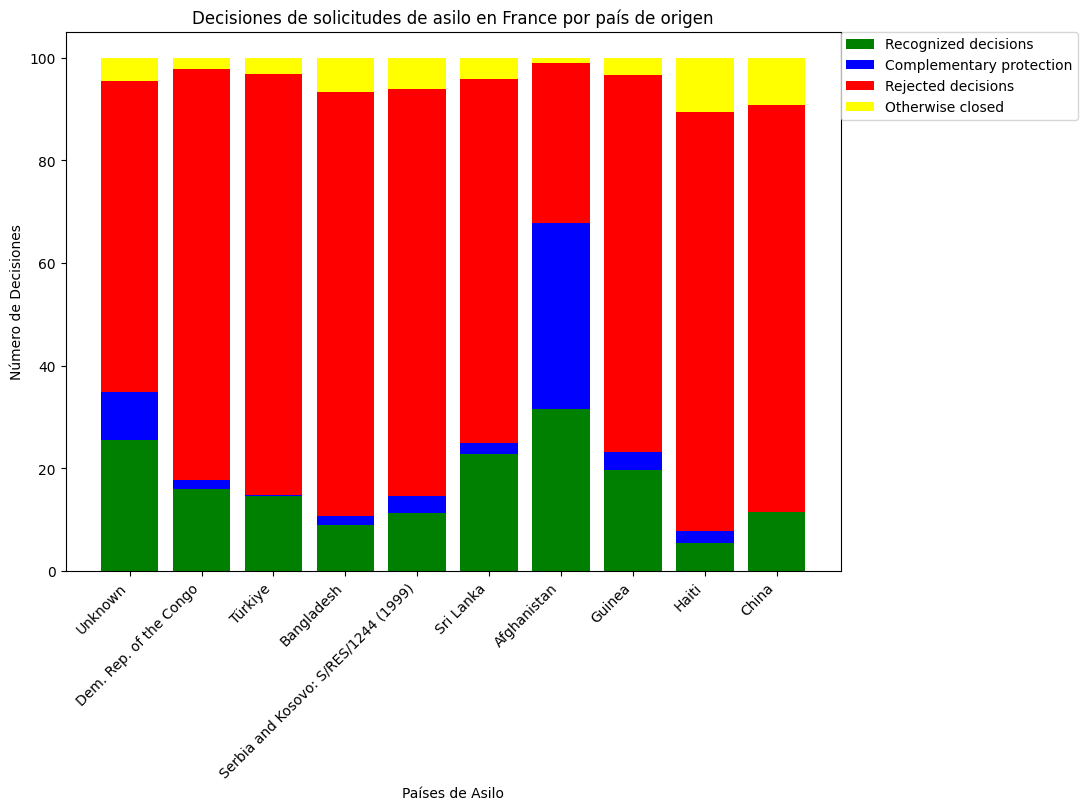

In [77]:
asylum_country_graph('France')

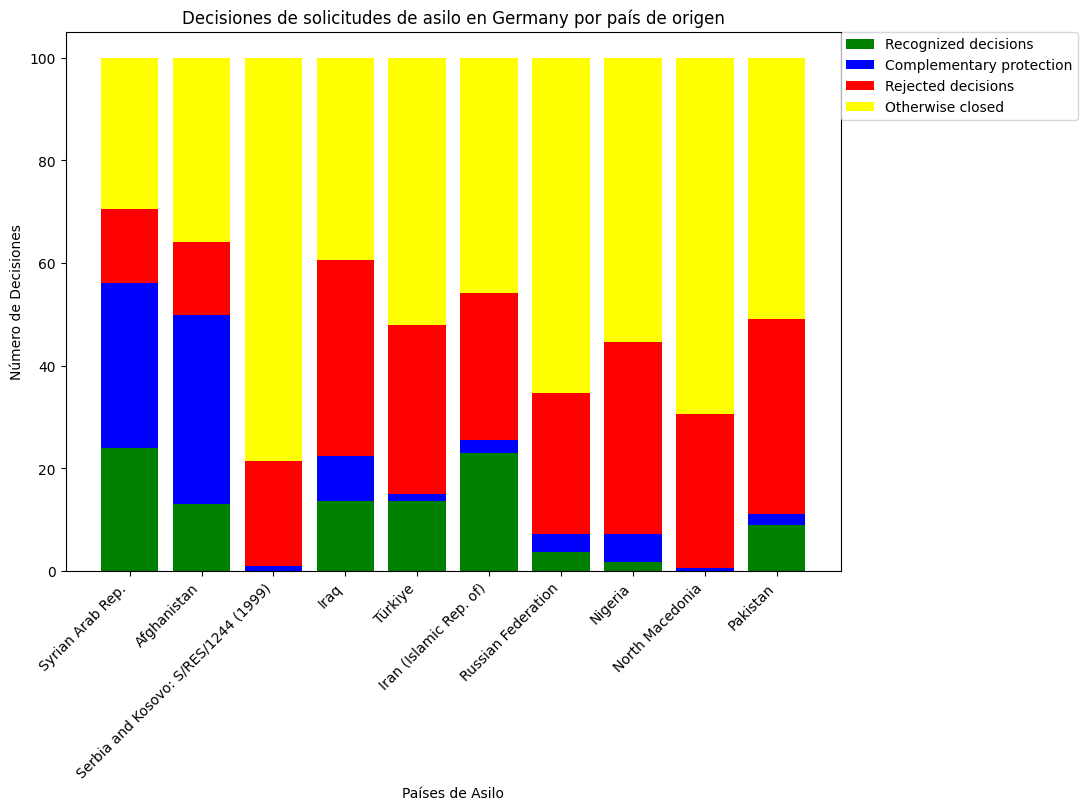

In [78]:
asylum_country_graph('Germany')

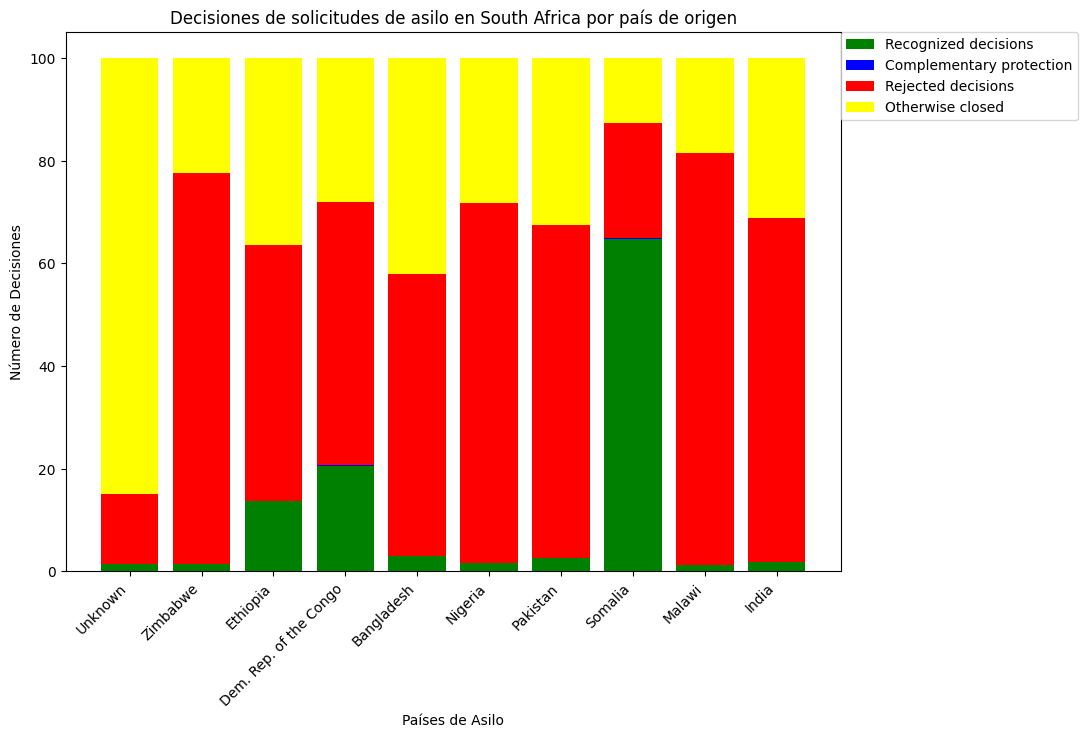

In [79]:
asylum_country_graph('South Africa')

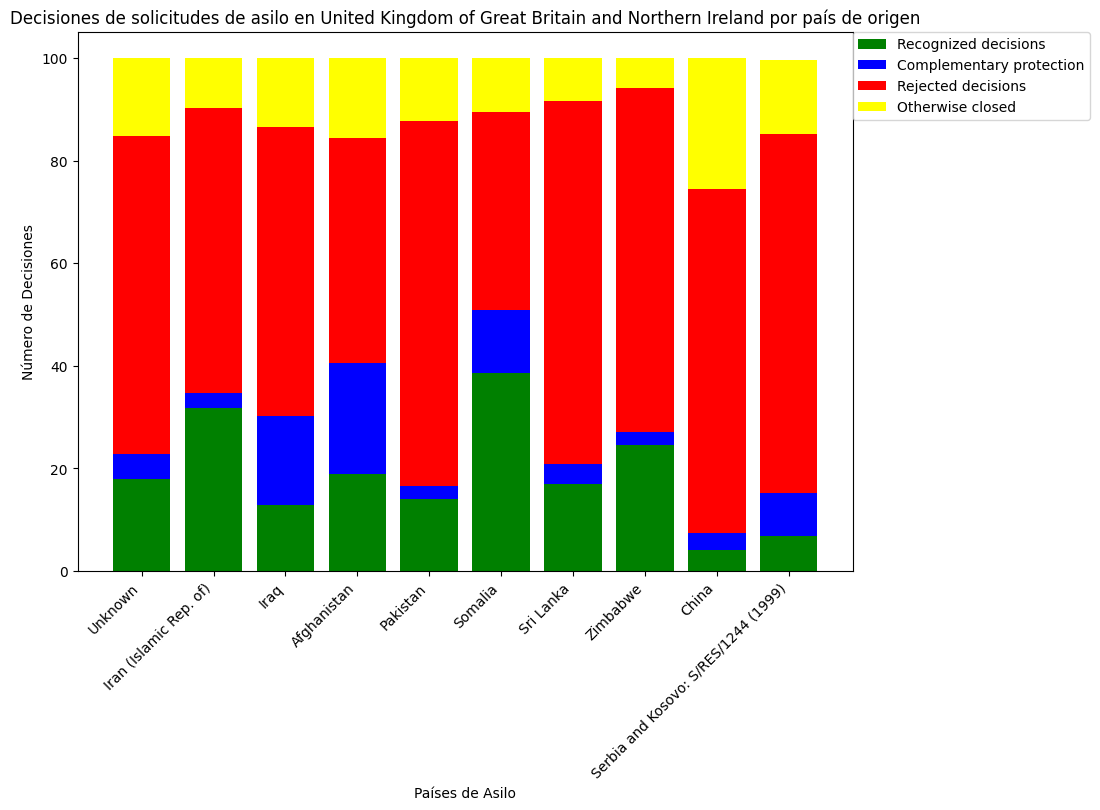

In [80]:
asylum_country_graph('United Kingdom of Great Britain and Northern Ireland')

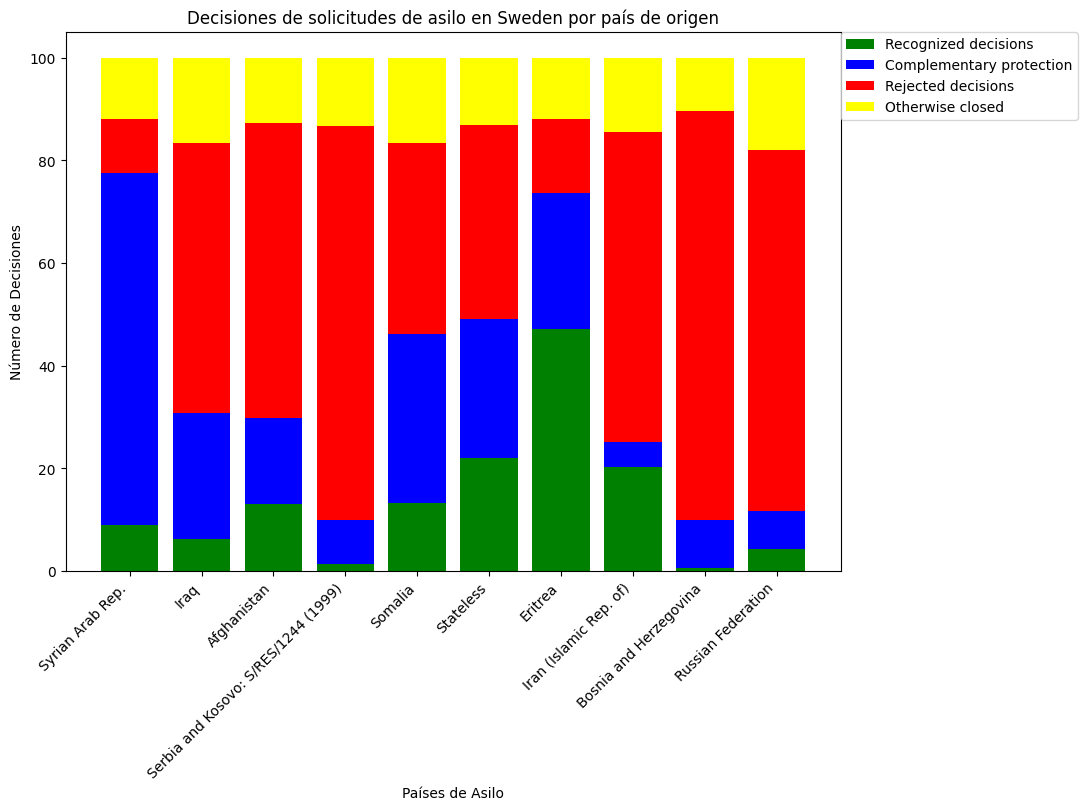

In [81]:
asylum_country_graph('Sweden')

In [82]:
# demographics = pd.read_csv('Data/demographics.csv', header=13)

In [83]:
# demographics.groupby(['Year', 'Country of origin'])['Total'].sum().reset_index().sort_values('Total', ascending=False).head(10)  

In [84]:
# asylum.groupby(['Year', 'Country of origin'])['Total decisions'].sum().reset_index().sort_values('Total decisions', ascending=False).head(10)  